### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [232]:
# data analysis
import pandas as pd
# data visualization
import matplotlib.pyplot as plt

df = pd.read_csv('online_retail_II.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


## Section 1

### Create New Feature: Year

In [234]:
pd.to_datetime(df['InvoiceDate'])
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Filtering Data

In [235]:
sales = df[(df['Quantity'] >= 1) & (df['Invoice'] != "C")]
sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Create New Feature: Revenue

In [236]:
df['Revenue'] = df['Quantity'] * df['Price']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


### Average of Revenue per Year

In [237]:
revenue = df.groupby('Year')['Revenue'].mean().reset_index()
revenue.reset_index()

,index,Year,Revenue
0,0,2009,17.684777
1,1,2010,18.152555
2,2,2011,18.018195


In [238]:
# deskripsi statistik dari revenue
revenue.describe()

,Year,Revenue
count,3.0,3.000000
mean,2010.0,17.951842
std,1.0,0.240844
min,2009.0,17.684777
25%,2009.5,17.851486
50%,2010.0,18.018195
75%,2010.5,18.085375
max,2011.0,18.152555


In [239]:
# find total sales per year
total_sales = df.groupby('Year')['Quantity'].count().reset_index()
total_sales.reset_index()

,index,Year,Quantity
0,0,2009,45228
1,1,2010,522714
2,2,2011,499429


In [240]:
# total sales 3 years
df['Quantity'].shape

(1067371,)

In [241]:
# deskripsi statistik dari total sales
total_sales.describe()

,Year,Quantity
count,3.0,3.000000
mean,2010.0,355790.333333
std,1.0,269206.742060
min,2009.0,45228.000000
25%,2009.5,272328.500000
50%,2010.0,499429.000000
75%,2010.5,511071.500000
max,2011.0,522714.000000


In [242]:
# find best seller
best_seller = df.groupby('Description')['Quantity'].count().sort_values(ascending=False)
best_seller.head(10).reset_index()

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,5918
1,REGENCY CAKESTAND 3 TIER,4412
2,JUMBO BAG RED RETROSPOT,3469
3,ASSORTED COLOUR BIRD ORNAMENT,2958
4,PARTY BUNTING,2765
5,STRAWBERRY CERAMIC TRINKET BOX,2613
6,LUNCH BAG BLACK SKULL.,2529
7,JUMBO STORAGE BAG SUKI,2434
8,HEART OF WICKER SMALL,2319
9,JUMBO SHOPPER VINTAGE RED PAISLEY,2297


### Interpretation

Dari hasil analisis menggunakan pandas di atas, diketahui bahwa:

### Revenue per tahun:
*  2009 = **17.68**
*  2010 = **18.15**
*  2011 = **18.01**, dengan rata-rata pendapatan keseluruhan sebesar **17.95** dalam jangka waktu 3 tahun

### Total barang terjual per tahun:
* 2009 = **45.228**
* 2010 = **522.714**
* 2011 = **499.429**

Total barang terjual selama 3 tahun adalah **1.067.317** unit dengan rata-rata sebesar **355,790** unit. Penjualan terbanyak ada pada produk **WHITE HANGING HEART T-LIGHT HOLDER**	sebanyak **5918** unit

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [243]:
# sales = df[(df['Quantity'] >= 1) & (df['Invoice'] != "C")]
finished = sales[sales['Customer ID'].notnull()]
finished

# check for null customer ids
# finished.isna().sum()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


#### Customers who canceled their purchases

In [244]:
# # cancel = df[~df['Invoice'].str.contains("C")]
# cancel = df[df['Invoice'] >= "C"]
# cancel

In [245]:
# cancel = df[~df['Invoice'].str.contains("C")]
cancel = df[(df['Customer ID'].notnull()) & (df['Invoice'] >= "C")]
cancel
# cancel.isna().sum()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.40
...,...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,-9.13
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,-224.69
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,-54.75
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,-1.25


### Number of Finished and Canceled Transactions Each Year

In [246]:
# define years for later use
years = ['2009', '2010', '2011']

In [247]:
# number of finished transactions each year
numfin = finished.groupby('Year')['Invoice'].count()

# # visualize
# plt.figure(figsize=(10, 5))
# plt.title ("Transaksi berhasil per tahun")
# plt.bar(years, numfin)


numfin.reset_index()

,Year,Invoice
0,2009,30761
1,2010,403094
2,2011,371765


In [248]:
# number of cancelled transactions each year
numcan = cancel.groupby('Year')['Invoice'].count()

# # visualize cancellation per year
# plt.figure(figsize=(10, 5))
# plt.title ("Transaksi gagal per tahun")
# plt.bar(years, numcan)

numcan.reset_index()

,Year,Invoice
0,2009,999
1,2010,9530
2,2011,8215


In [249]:
# number of all customers
customers = finished['Customer ID'].count()
customers

805620

### Cancellation Rate

In [250]:
# calculate the cancellation rate per year
cancel_rate = (numcan / customers) * 100

# # visualize
# plt.figure(figsize=(10, 5))
# plt.title("Cancellation rate per Year")
# plt.bar(years, cancel_rate)

# display results
cancel_rate.reset_index()

,Year,Invoice
0,2009,0.124004
1,2010,1.182940
2,2011,1.019712


### Interpretation

Dari hasil analisis pada Section 2, performa penjualan  3 tahun terakhir dapat disimpulkan sebagai berikut:
* **805620** customer menyelesaikan order hingga tahap pembayaran
* **18744** customer membatalkan ordernya

,Year,Invoice
0,2009,30761
1,2010,403094
2,2011,371765


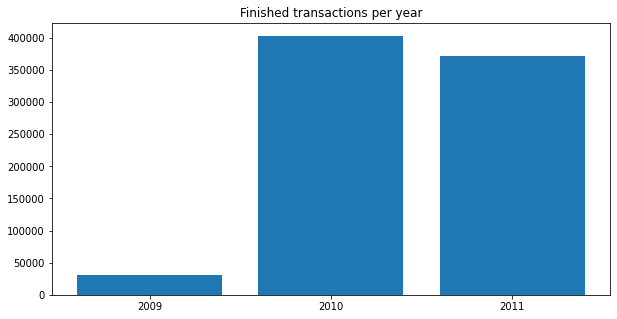

In [251]:
# visualize
plt.figure(figsize=(10, 5))
plt.title ("Finished transactions per year")
plt.bar(years, numfin)

numfin.reset_index()

Transaksi tahun 2010 mengalami peningkatan yang sangat pesat dari 2009, dan sedikit menurun di tahun berikutnya.

In [252]:
# # visualize cancellation per year
# plt.figure(figsize=(10, 5))
# plt.title ("Cancelled transactions per year")
# plt.bar(years, numcan)

# numcan.reset_index()

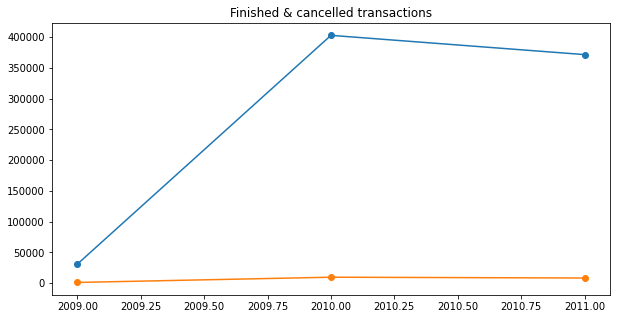

In [253]:
plt.figure(figsize=(10, 5))
plt.title ("Finished & cancelled transactions")
plt.plot(numfin, marker="o")
plt.plot(numcan, marker="o")
plt.show()

Jumlah transaksi dibatalkan terpaut cukup jauh dari transaksi berhasil.

In [254]:
type(numfin)

pandas.core.series.Series